# Clean all pieces of data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score 

## First, download the data

In [2]:
IW = pd.read_excel('Inglehart - Welzel.xlsx')

In [3]:
GPI = pd.read_excel('global peace index.xlsx')

In [4]:
EF = pd.read_csv('eco footprint.csv')

In [5]:
EI = pd.read_excel('educationindex.xlsx')

In [6]:
GDP = pd.read_excel('GDP nominal.xlsx')

In [7]:
gini = pd.read_csv('Gini.csv')

In [8]:
LE = pd.read_excel('life expectancy at birth.xlsx')

In [9]:
religions = pd.read_csv('Religions.csv')

In [10]:
WHR = pd.read_csv('world happiness ranking.csv')

## Let's standarize the country names

In [11]:
# We will put all country names into a list
lst = []

In [12]:
IW.head()

,nation & wave,Trad Rat values,Surv Self values
0,Albania 3,0.52,-1.56
1,Albania 4,0.07,-1.14
2,Algeria 4,-1.48,-0.74
3,Andorra 5,0.80,1.62
4,Argentina 1,0.00,-0.30


In [13]:
IWdict={}
counter = 0
for cell in IW['nation & wave']:
    lst.append(str(cell)[:-2])
    IWdict[str(cell)[:-2]]=IW['Trad Rat values'][counter], IW['Surv Self values'][counter]
    counter += 1

In [14]:
GPI.head()

,Country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Iceland,1.111,1.160,1.143,1.099,1.159,1.164,1.160,1.142,1.138,1.084,1.096,1.072
1,New Zealand,1.261,1.260,1.251,1.255,1.276,1.291,1.271,1.263,1.238,1.216,1.188,1.221
2,Portugal,1.387,1.437,1.472,1.485,1.520,1.525,1.466,1.418,1.324,1.273,1.315,1.274
3,Austria,1.337,1.369,1.383,1.416,1.407,1.309,1.287,1.264,1.249,1.292,1.273,1.291
4,Denmark,1.272,1.269,1.334,1.290,1.235,1.197,1.179,1.179,1.201,1.299,1.313,1.316


In [15]:
for cell in GPI['Country']:
    lst.append(cell)

In [16]:
EF.head()

,country,footprintPerCap,biocapPerCap,biocapDeficitPerCap,totalBiocap,pop2022
0,Luxembourg,15.82,1.68,-14.14,-7.35,642.371
1,Aruba,11.88,0.57,-11.31,-1.13,107.609
2,Qatar,10.80,1.24,-9.56,-19.60,2979.915
3,Australia,9.31,16.57,7.26,167.34,26068.792
4,United States,8.22,3.76,-4.46,-1416.05,334805.269


In [17]:
for cell in EF['country']:
    lst.append(cell)

In [18]:
EI.head()

,Unnamed: 0,Rank,Education index
0,NaN,1.0,0.940
1,NaN,NaN,NaN
2,Germany,NaN,NaN
3,NaN,2.0,0.929
4,NaN,NaN,NaN


In [19]:
for cell in EI['Unnamed: 0']:
    lst.append(cell)

In [20]:
GDP.head()

,Country/Territory,IMF,United Nations,World Bank
0,United States,22939580.0,20893746.0,20936600.0
1,China,16862979.0,14722801.0,14722731.0
2,Japan,5103110.0,5057759.0,4975415.0
3,Germany,4230172.0,3846414.0,3806060.0
4,United Kingdom,3108416.0,2764198.0,2707744.0


In [21]:
for cell in GDP['Country/Territory']:
    lst.append(cell)

In [22]:
gini.head()

,country,giniWB,yearWB,giniCIA,yearCIA,pop2022
0,South Africa,63.0,2014.0,63.0,2014.0,60756.135
1,Namibia,59.1,2015.0,59.1,2015.0,2633.874
2,Suriname,57.9,1999.0,NaN,NaN,596.831
3,Zambia,57.1,2015.0,57.1,2015.0,19470.234
4,Sao Tome and Principe,56.3,2017.0,56.3,2017.0,227.679


In [23]:
for cell in gini['country']:
    lst.append(cell)

In [24]:
LE.head()

,country,life expectancy at birth
0,Aruba,76.293000
1,Africa Eastern and Southern,64.005197
2,Afghanistan,64.833000
3,Africa Western and Central,58.115723
4,Angola,61.147000


In [25]:
for cell in LE['country']:
    lst.append(cell)

In [26]:
religions.head()

,country,chistians,muslims,unaffiliated,hindus,buddhists,folkReligions,other,jews
0,Afghanistan,30000,31330000,5000,10000,5000,5000,20000,5000
1,Albania,580000,2570000,50000,5000,5000,5000,5000,5000
2,Algeria,60000,34730000,660000,5000,5000,10000,5000,5000
3,American Samoa,50000,5000,5000,5000,5000,5000,5000,5000
4,Andorra,70000,5000,5000,5000,5000,5000,5000,5000


In [27]:
for cell in religions['country']:
    lst.append(cell)

In [28]:
WHR.head()

,rank,country,happiness2021,happiness2020,pop2022
0,1,Finland,7.842,7.809,5554.960
1,2,Denmark,7.620,7.646,5834.950
2,3,Switzerland,7.571,7.560,8773.637
3,4,Iceland,7.554,7.504,345.393
4,5,Netherlands,7.464,7.449,17211.447


In [29]:
for cell in WHR['country']:
    lst.append(cell)

### Now that we have appended every country name in our data, let's see the unique values that we have:

In [30]:
set(lst)

{'Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Britain',
 'British Virgin Islands',
 'Brunei',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Islands',
 'Costa Rica',
 "Cote d' Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Curaçao',
 'Cyprus',
 'Czec

As you can see, there is something wrong with some of it. We will try to clean up asmuch as we can before manually look at every possible duplicate values (for example Korea rep. and South Korea) or drop every value that is not a country (for example Sub-Saharan Africa)

In [31]:
# first we will see how to remove the '\xa0' in front of some values

counter=0
for element in lst:
    if str(element)[:1] == '\xa0':
        lst[counter] = element[1:]
    counter += 1

In [32]:
# now we can see every value and check for duplicates
set(lst)

{'Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Britain',
 'British Virgin Islands',
 'Brunei',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Islands',
 'Costa Rica',
 "Cote d' Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Curaçao',
 'Cypru

In [33]:
# Sadly, the discrimination between what is a country and what is not, or what is a country written badly
# or in different "official" names, or a group of countries, or a region, is best and fastest done manually.
# Here is the result as a dictionary for substitutions and a list for erasure.

to_substitute ={'Yemen, Rep.': 'Yemen', 'Palestinian National Authority': 'Palestine', 'West Bank and Gaza':'Palestine',
            'Venezuela, RB':'Venezuela', 'United States': 'United States of America', 'USA': 'United States of America',
            'Trinidad':'Trinidad and Tobago', 'The Gambia':'Gambia', 'São Tomé and Príncipe': 'São Tomé and Principe',
            'Sao Tome and Principe': 'São Tomé and Principe', 'Syrian Arab Republic': 'Syria', 'St. Lucia': 'Saint Lucia',
            'St. Kitts and Nevis': 'Saint Kitts and Nevis', 'Slovak Republic':'Slovakia', 'Singapo':'Singapore',
            'Russian Federation': 'Russia', 'Republic of the Congo':'Congo', 'Philipines':'Philippines',
            'Phillipines':'Philippines', 'Macedonia (FYR) ': 'Macedonia', 'Lao PDR': 'Laos', 'Kyrgyz Republic': 'Kyrgyzstan',
            'Kyrgyzistan': 'Kyrgyzstan', "Korea, Dem. People's Rep.":'North Korea', 'Korea, Rep.': 'South Korea',
            "Côte d'Ivoire":'Ivory Coast', "Cote d' Ivoire": 'Ivory Coast', 'Iran, Islamic Rep.': 'Iran',
            'Hong Kong SAR, China': 'Hong Kong', 'Gambia, The': 'Gambia', 'Egypt, Arab Rep.': 'Egypt',
            'DR Congo': 'Democratic Republic of the Congo', 'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
            'Congo, Rep.': 'Congo', 'Czech':'Czech Republic', 'Curacao': 'Curaçao', 'Cape Verde': 'Cabo Verde',
            'Brunei Darussalam': 'Brunei', 'Bosnia': 'Bosnia and Herzegovina', 'Bahamas, The': 'Bahamas'}

to_drop = ['World', 'Western Sahara', 'Wallis and Futuna', 'Virgin Islands (U.S.)', 'Upper middle income',
        'United States Virgin Islands', 'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD)',
        'Sub-Saharan Africa (excluding high income)', 'St. Martin (French part)', 'South Asia', 'South Asia (IDA & IBRD)',
        'Small states', 'Sint Maarten', 'Sint Maarten (Dutch part)', 'Saint Pierre and Miquelon', 'Reunion',
        'Post-demographic dividend', 'Pre-demographic dividend', 'Pacific island small states', 'Other small states',
        'OECD members', 'North America', 'Niue', 'Montserrat', 'Middle East & North Africa',
        'Middle East & North Africa (IDA & IBRD)', 'Middle East & North Africa (excluding high income)', 'Middle income',
        'Micronesia', 'Micronesia, Fed. Sts.', 'Martinique', 'Low & middle income', 'Low income', 'Lower middle income',
        'Macao SAR, China', 'Macau', 'Late-demographic dividend', 'Latin America & Caribbean',
        'Latin America & Caribbean (IDA & IBRD)', 'Latin America & Caribbean (excluding high income)',
        'Least developed countries: UN classification', 'Heavily indebted poor countries (HIPC)', 'High income', 'Guadeloupe',
        'Gibraltar', 'Galicia', 'Fragile and conflict affected situations', 'French Guiana', 'French Polynesia',
        'Federated States of Micronesia', 'Faroe Islands', 'Falkland Islands', 'Euro area', 'Europe & Central Asia',
        'Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)', 'European Union',
        'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)',
        'East Asia & Pacific (excluding high income)', 'Central Europe and the Baltics', 'Cayman Islands',
        'Caribbean small states', 'British Virgin Islands', 'Bermuda', 'Africa Eastern and Southern',
        'Africa Western and Central', 'Arab World', 'Aruba', 'Anguilla', 'American Samoa', 'Moscow', 'North Ireland']

In [34]:
# now we can set up a cleaning function!

def clean(df,column):
    counter = 0
    for cell in column:
        if str(cell)[:1] == '\xa0':
            column[counter] = str(cell)[1:]
        if str(cell) in to_drop:
            df.drop(df.index[counter])
        counter += 1
    for key in to_substitute.keys():
        column.mask(column == str(key), str(to_substitute[str(key)]), inplace=True)

## Cleaning

### Clean Inglehart Welzel data

In [35]:
fixedIW=pd.DataFrame.from_dict(IWdict, orient='index')

In [36]:
fixedIW.reset_index(inplace=True)

In [37]:
fixedIW.head()

,index,0,1
0,Albania,0.07,-1.14
1,Algeria,-1.48,-0.74
2,Andorra,0.80,1.62
3,Argentina,-0.66,0.38
4,Armenia,0.55,-1.31


In [38]:
clean(fixedIW, fixedIW['index'])

In [39]:
fixedIW = fixedIW.rename(columns={0: "trad_rat_values", 1: "surv_self_values", 'index': 'country'})

In [40]:
fixedIW

,country,trad_rat_values,surv_self_values
0,Albania,0.070,-1.14
1,Algeria,-1.480,-0.74
2,Andorra,0.800,1.62
3,Argentina,-0.660,0.38
4,Armenia,0.550,-1.31
...,...,...,...
94,Venezuela,-1.600,0.43
95,Vietnam,-0.300,-0.26
96,Zambia,-0.770,-0.62
97,Zimbabwe,-1.500,-1.36


### Clean global peace index data

In [41]:
GPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  163 non-null    object 
 1   2008     161 non-null    float64
 2   2009     161 non-null    float64
 3   2010     161 non-null    float64
 4   2011     162 non-null    float64
 5   2012     162 non-null    float64
 6   2013     162 non-null    float64
 7   2014     162 non-null    float64
 8   2015     162 non-null    float64
 9   2016     163 non-null    float64
 10  2017     163 non-null    float64
 11  2018     163 non-null    float64
 12  2019     163 non-null    float64
dtypes: float64(12), object(1)
memory usage: 16.7+ KB


In [42]:
GPI.head()

,Country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Iceland,1.111,1.160,1.143,1.099,1.159,1.164,1.160,1.142,1.138,1.084,1.096,1.072
1,New Zealand,1.261,1.260,1.251,1.255,1.276,1.291,1.271,1.263,1.238,1.216,1.188,1.221
2,Portugal,1.387,1.437,1.472,1.485,1.520,1.525,1.466,1.418,1.324,1.273,1.315,1.274
3,Austria,1.337,1.369,1.383,1.416,1.407,1.309,1.287,1.264,1.249,1.292,1.273,1.291
4,Denmark,1.272,1.269,1.334,1.290,1.235,1.197,1.179,1.179,1.201,1.299,1.313,1.316


In [43]:
clean(GPI, GPI['Country'])

In [44]:
fixedGPI = GPI[['Country',2019]].copy()
fixedGPI.rename(columns={2019: 'global_peace_index', 'Country': 'country'}, inplace=True, errors='raise')

In [45]:
fixedGPI

,country,global_peace_index
0,Iceland,1.072
1,New Zealand,1.221
2,Portugal,1.274
3,Austria,1.291
4,Denmark,1.316
...,...,...
158,Iraq,3.369
159,Yemen,3.412
160,South Sudan,3.526
161,Syria,3.566


### Clean ecological footprint data

In [46]:
EF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              187 non-null    object 
 1   footprintPerCap      187 non-null    float64
 2   biocapPerCap         187 non-null    float64
 3   biocapDeficitPerCap  187 non-null    float64
 4   totalBiocap          187 non-null    float64
 5   pop2022              187 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.9+ KB


In [47]:
EF.head()

,country,footprintPerCap,biocapPerCap,biocapDeficitPerCap,totalBiocap,pop2022
0,Luxembourg,15.82,1.68,-14.14,-7.35,642.371
1,Aruba,11.88,0.57,-11.31,-1.13,107.609
2,Qatar,10.80,1.24,-9.56,-19.60,2979.915
3,Australia,9.31,16.57,7.26,167.34,26068.792
4,United States,8.22,3.76,-4.46,-1416.05,334805.269


In [48]:
clean(EF, EF['country'])

In [49]:
fixedEF = EF[['country','footprintPerCap']].copy()

In [50]:
fixedEF

,country,footprintPerCap
0,Luxembourg,15.82
1,Aruba,11.88
2,Qatar,10.80
3,Australia,9.31
4,United States of America,8.22
...,...,...
182,Pakistan,0.79
183,Bangladesh,0.72
184,Haiti,0.61
185,Eritrea,0.49


### Clean education index data

In [51]:
EI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       189 non-null    object 
 1   Rank             189 non-null    float64
 2   Education index  189 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.4+ KB


In [52]:
EI.head()

,Unnamed: 0,Rank,Education index
0,NaN,1.0,0.940
1,NaN,NaN,NaN
2,Germany,NaN,NaN
3,NaN,2.0,0.929
4,NaN,NaN,NaN


In [53]:
counter=0
for cell in EI['Unnamed: 0']:
    try:
        EI['Unnamed: 0'][counter] = EI['Unnamed: 0'][counter+2]
    except:
        pass
    counter+= 1

C:\Users\x\AppData\Local\Temp/ipykernel_22476/1532366911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EI['Unnamed: 0'][counter] = EI['Unnamed: 0'][counter+2]


In [54]:
EI.head()

,Unnamed: 0,Rank,Education index
0,Germany,1.0,0.940
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,Australia,2.0,0.929
4,NaN,NaN,NaN


In [55]:
fixedEI=EI.dropna()

In [56]:
clean(fixedEI, fixedEI['Unnamed: 0'])

C:\Users\x\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [57]:
fixedEI = fixedEI[['Unnamed: 0','Education index']].copy()

In [58]:
fixedEI = fixedEI.rename(columns={'Unnamed: 0': 'country'})

In [59]:
fixedEI

,country,Education index
0,Germany,0.940
3,Australia,0.929
6,Denmark,0.920
9,Ireland,0.918
12,New Zealand,0.917
...,...,...
552,South Sudan,0.297
555,Mali,0.293
558,Burkina Faso,0.286
561,Eritrea,0.281


### Clean nominal GDP data

In [60]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Territory  216 non-null    object 
 1   IMF                196 non-null    float64
 2   United Nations     213 non-null    float64
 3   World Bank         210 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.9+ KB


In [61]:
GDP.head()

,Country/Territory,IMF,United Nations,World Bank
0,United States,22939580.0,20893746.0,20936600.0
1,China,16862979.0,14722801.0,14722731.0
2,Japan,5103110.0,5057759.0,4975415.0
3,Germany,4230172.0,3846414.0,3806060.0
4,United Kingdom,3108416.0,2764198.0,2707744.0


In [62]:
clean(GDP, GDP['Country/Territory'])

C:\Users\x\AppData\Local\Temp/ipykernel_22476/3887060497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[counter] = str(cell)[1:]


In [63]:
fixedGDP = GDP[['Country/Territory','IMF']].copy()

In [64]:
fixedGDP = fixedGDP.rename(columns={'Country/Territory': 'country'})

In [65]:
fixedGDP

,country,IMF
0,United States of America,22939580.0
1,China,16862979.0
2,Japan,5103110.0
3,Germany,4230172.0
4,United Kingdom,3108416.0
...,...,...
211,Kiribati,232.0
212,Palau,208.0
213,Nauru,133.0
214,Montserrat,NaN


### Clean Gini index data

In [66]:
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  176 non-null    object 
 1   giniWB   163 non-null    float64
 2   yearWB   163 non-null    float64
 3   giniCIA  165 non-null    float64
 4   yearCIA  165 non-null    float64
 5   pop2022  176 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.4+ KB


In [67]:
gini.head()

,country,giniWB,yearWB,giniCIA,yearCIA,pop2022
0,South Africa,63.0,2014.0,63.0,2014.0,60756.135
1,Namibia,59.1,2015.0,59.1,2015.0,2633.874
2,Suriname,57.9,1999.0,NaN,NaN,596.831
3,Zambia,57.1,2015.0,57.1,2015.0,19470.234
4,Sao Tome and Principe,56.3,2017.0,56.3,2017.0,227.679


In [68]:
clean(gini, gini['country'])

In [69]:
fixedgini = gini[['country','giniCIA']].copy()

In [70]:
fixedgini

,country,giniCIA
0,South Africa,63.0
1,Namibia,59.1
2,Suriname,NaN
3,Zambia,57.1
4,São Tomé and Principe,56.3
...,...,...
171,Hong Kong,53.9
172,Cambodia,37.9
173,Taiwan,33.6
174,Saudi Arabia,45.9


### Clean life expectancy at birth data

In [71]:
LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   260 non-null    object 
 1   life expectancy at birth  241 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [72]:
LE.head()

,country,life expectancy at birth
0,Aruba,76.293000
1,Africa Eastern and Southern,64.005197
2,Afghanistan,64.833000
3,Africa Western and Central,58.115723
4,Angola,61.147000


In [73]:
clean(LE, LE['country'])

In [74]:
fixedLE = LE

### Clean religions data

In [75]:
religions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        228 non-null    object
 1   chistians      228 non-null    int64 
 2   muslims        228 non-null    int64 
 3   unaffiliated   228 non-null    int64 
 4   hindus         228 non-null    int64 
 5   buddhists      228 non-null    int64 
 6   folkReligions  228 non-null    int64 
 7   other          228 non-null    int64 
 8   jews           228 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 16.2+ KB


In [76]:
religions.head()

,country,chistians,muslims,unaffiliated,hindus,buddhists,folkReligions,other,jews
0,Afghanistan,30000,31330000,5000,10000,5000,5000,20000,5000
1,Albania,580000,2570000,50000,5000,5000,5000,5000,5000
2,Algeria,60000,34730000,660000,5000,5000,10000,5000,5000
3,American Samoa,50000,5000,5000,5000,5000,5000,5000,5000
4,Andorra,70000,5000,5000,5000,5000,5000,5000,5000


In [77]:
clean(religions, religions['country'])

In [78]:
fixedreligions = religions

### Clean word happiness index data

In [79]:
WHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           146 non-null    int64  
 1   country        146 non-null    object 
 2   happiness2021  146 non-null    float64
 3   happiness2020  146 non-null    float64
 4   pop2022        146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [80]:
WHR.head()

,rank,country,happiness2021,happiness2020,pop2022
0,1,Finland,7.842,7.809,5554.960
1,2,Denmark,7.620,7.646,5834.950
2,3,Switzerland,7.571,7.560,8773.637
3,4,Iceland,7.554,7.504,345.393
4,5,Netherlands,7.464,7.449,17211.447


In [81]:
clean(WHR, WHR['country'])

In [82]:
fixedWHR = WHR[['country','happiness2021']].copy()

In [83]:
fixedWHR

,country,happiness2021
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
...,...,...
141,Lesotho,3.512
142,Botswana,3.467
143,Rwanda,3.415
144,Zimbabwe,3.145


# Join all selected data into a single dataframe

In [84]:
data_frames = [fixedIW, fixedGPI, fixedEF, fixedEI, fixedGDP, fixedgini, fixedLE, fixedreligions, fixedWHR]
data = reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='outer'), data_frames)

In [85]:
data.rename(columns={"trad_rat_values": "tradition_secularism", "surv_self_values": "survival_self-expression", "global_peace_index": "unpeacefulness", "footprintPerCap": "eco_footprint", "Education index": "education", "IMF":"nominal_GDP", "giniCIA":"inequality", "life expectancy at birth": "life_expectancy", "chistians": "religion_christian", "muslims": "religion_muslim", "unaffiliated":"religion_unaffiliated", "hindus": "religion_hinduism", "buddhists": "religion_buddhism", "folkReligions": "religion_folk", "other": "religions_other", "jews": "religion_judaism", "happiness2021": "happiness"},
errors="raise", inplace=True)

In [86]:
data=data.set_index('country')

In [87]:
data

,tradition_secularism,survival_self-expression,unpeacefulness,eco_footprint,education,nominal_GDP,inequality,life_expectancy,religion_christian,religion_muslim,religion_unaffiliated,religion_hinduism,religion_buddhism,religion_folk,religions_other,religion_judaism,happiness
country,,,,,,,,,,,,,,,,,
Albania,0.07,-1.14,1.821,2.21,0.745,1677.0,33.2,78.573,580000.0,2570000.0,50000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5.117
Algeria,-1.48,-0.74,2.219,2.12,0.664,163812.0,27.6,76.880,60000.0,34730000.0,660000.0,5000.0,5000.0,10000.0,5000.0,5000.0,4.887
Andorra,0.80,1.62,NaN,NaN,0.714,3213.0,NaN,NaN,70000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,NaN
Argentina,-0.66,0.38,1.989,3.14,0.816,455172.0,41.4,76.667,34420000.0,400000.0,4920000.0,5000.0,20000.0,330000.0,120000.0,200000.0,5.929
Armenia,0.55,-1.31,2.294,2.23,0.749,13612.0,34.4,75.087,3050000.0,5000.0,40000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Pierre and Miquelon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,NaN
Tokelau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,NaN
United States Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,NaN


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, Albania to Western Sahara
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tradition_secularism      99 non-null     float64
 1   survival_self-expression  99 non-null     float64
 2   unpeacefulness            163 non-null    float64
 3   eco_footprint             187 non-null    float64
 4   education                 189 non-null    float64
 5   nominal_GDP               196 non-null    float64
 6   inequality                165 non-null    float64
 7   life_expectancy           241 non-null    float64
 8   religion_christian        228 non-null    float64
 9   religion_muslim           228 non-null    float64
 10  religion_unaffiliated     228 non-null    float64
 11  religion_hinduism         228 non-null    float64
 12  religion_buddhism         228 non-null    float64
 13  religion_folk             228 non-null    float64
 14

In [89]:
data= data.drop_duplicates()

In [90]:
dataredux=data[data['tradition_secularism'].notna()]

In [91]:
counter=0
for cell in dataredux['tradition_secularism']:
    if str(cell) == 'NaN':
        print (dataredux.iloc[[counter]])
    counter+=1

In [92]:
dataredux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, Albania to Germany
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tradition_secularism      99 non-null     float64
 1   survival_self-expression  99 non-null     float64
 2   unpeacefulness            89 non-null     float64
 3   eco_footprint             89 non-null     float64
 4   education                 93 non-null     float64
 5   nominal_GDP               94 non-null     float64
 6   inequality                90 non-null     float64
 7   life_expectancy           92 non-null     float64
 8   religion_christian        94 non-null     float64
 9   religion_muslim           94 non-null     float64
 10  religion_unaffiliated     94 non-null     float64
 11  religion_hinduism         94 non-null     float64
 12  religion_buddhism         94 non-null     float64
 13  religion_folk             94 non-null     float64
 14  religi

In [93]:
dataredux

,tradition_secularism,survival_self-expression,unpeacefulness,eco_footprint,education,nominal_GDP,inequality,life_expectancy,religion_christian,religion_muslim,religion_unaffiliated,religion_hinduism,religion_buddhism,religion_folk,religions_other,religion_judaism,happiness
country,,,,,,,,,,,,,,,,,
Albania,0.070,-1.14,1.821,2.21,0.745,1677.0,33.2,78.573000,580000.0,2570000.0,50000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5.117
Algeria,-1.480,-0.74,2.219,2.12,0.664,163812.0,27.6,76.880000,60000.0,34730000.0,660000.0,5000.0,5000.0,10000.0,5000.0,5000.0,4.887
Andorra,0.800,1.62,NaN,NaN,0.714,3213.0,NaN,NaN,70000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,NaN
Argentina,-0.660,0.38,1.989,3.14,0.816,455172.0,41.4,76.667000,34420000.0,400000.0,4920000.0,5000.0,20000.0,330000.0,120000.0,200000.0,5.929
Armenia,0.550,-1.31,2.294,2.23,0.749,13612.0,34.4,75.087000,3050000.0,5000.0,40000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,-1.600,0.43,2.671,3.57,0.741,44893.0,39.0,72.064000,25890000.0,90000.0,2900000.0,5000.0,5000.0,60000.0,20000.0,5000.0,4.892
Vietnam,-0.300,-0.26,1.877,1.65,0.626,368002.0,35.7,75.400000,7170000.0,160000.0,26040000.0,5000.0,14380000.0,39750000.0,350000.0,5000.0,5.411
Zambia,-0.770,-0.62,1.805,0.99,0.580,21699.0,57.1,63.886000,12770000.0,70000.0,70000.0,10000.0,5000.0,40000.0,120000.0,5000.0,4.073


In [94]:
for column in dataredux:
    dataredux.dropna(subset=[column], how='all', inplace=True)

C:\Users\x\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [95]:
dataredux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Albania to Germany
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tradition_secularism      85 non-null     float64
 1   survival_self-expression  85 non-null     float64
 2   unpeacefulness            85 non-null     float64
 3   eco_footprint             85 non-null     float64
 4   education                 85 non-null     float64
 5   nominal_GDP               85 non-null     float64
 6   inequality                85 non-null     float64
 7   life_expectancy           85 non-null     float64
 8   religion_christian        85 non-null     float64
 9   religion_muslim           85 non-null     float64
 10  religion_unaffiliated     85 non-null     float64
 11  religion_hinduism         85 non-null     float64
 12  religion_buddhism         85 non-null     float64
 13  religion_folk             85 non-null     float64
 14  religi

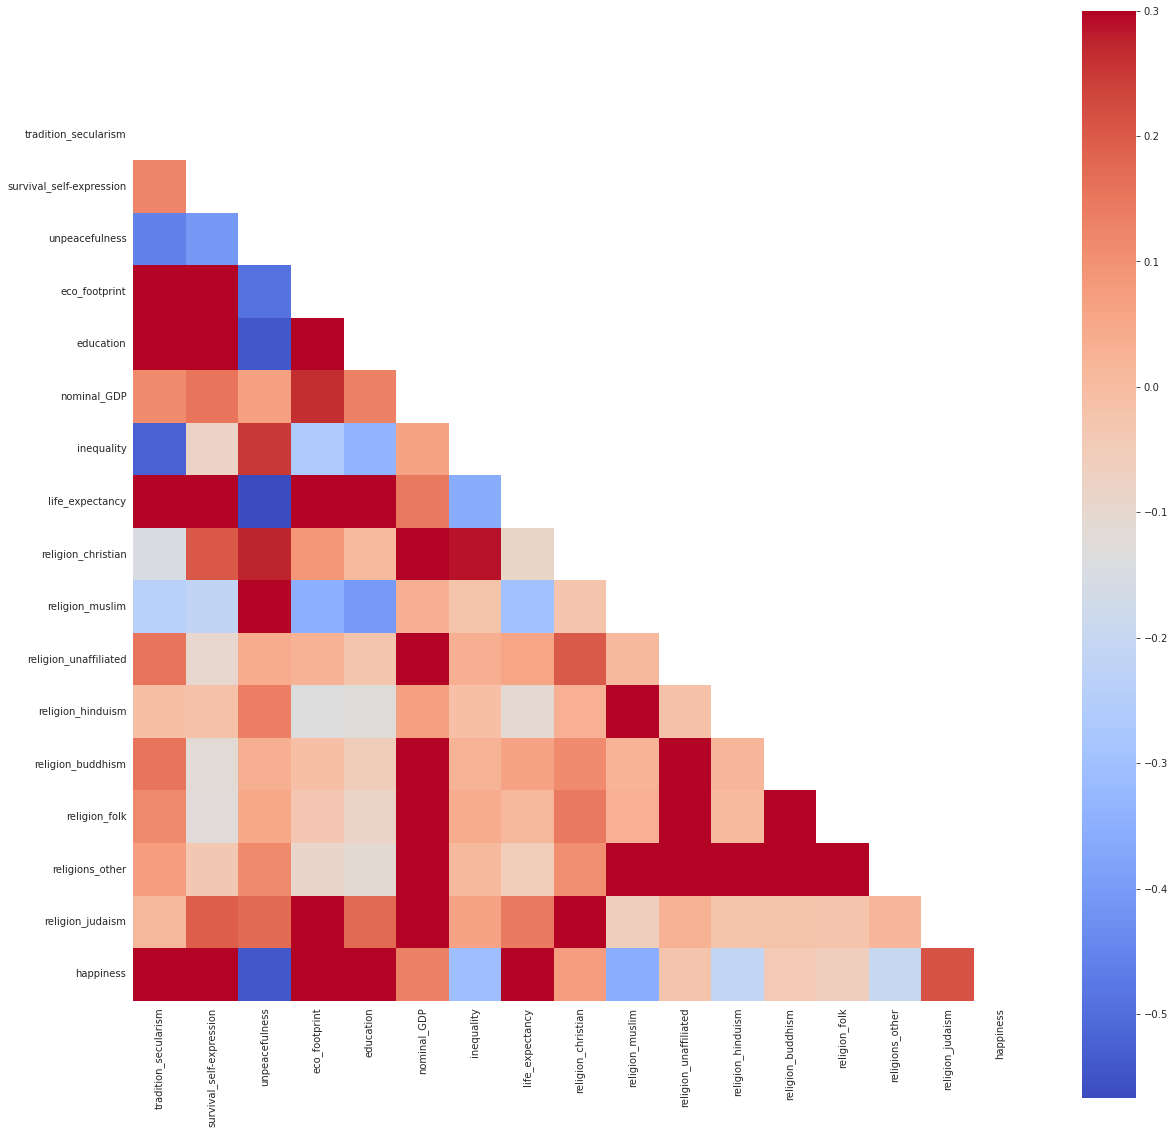

In [96]:
corr = dataredux.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, cmap='coolwarm', mask=mask, vmax=.3, square=True)

# Now that we have a dataframe, let's make some clusters

## First we will try doing them scaling the data

In [97]:
scaler=StandardScaler()

In [98]:
scaler.fit(dataredux)

StandardScaler()

In [99]:
array_scaled_redux=scaler.transform(dataredux)

In [100]:
scaled_redux=pd.DataFrame(array_scaled_redux,columns=["tradition_secularism", "survival_self-expression", "unpeacefulness", "eco_footprint", "education", "nominal_GDP", "inequality", "life_expectancy", "religion_christian", "religion_muslim", "religion_unaffiliated", "religion_hinduism", "religion_buddhism", "religion_folk", "religions_other", "religion_judaism", "happiness"])

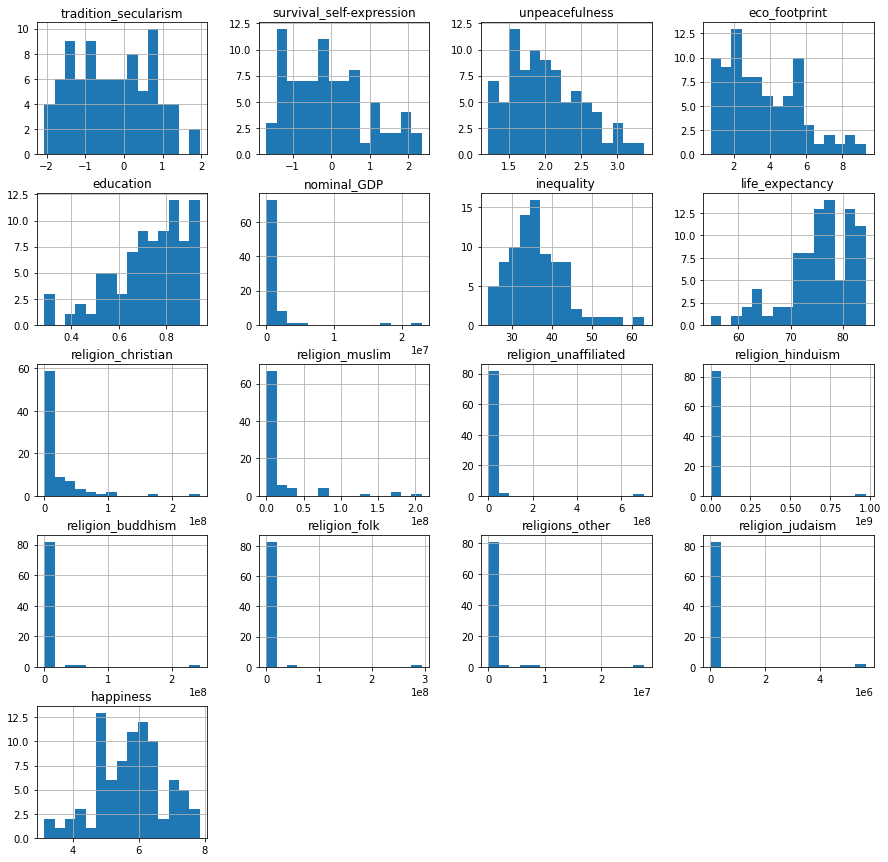

In [101]:
# let's see if the data has changed while scaling
dataredux.hist(bins=15,figsize=(15,15));

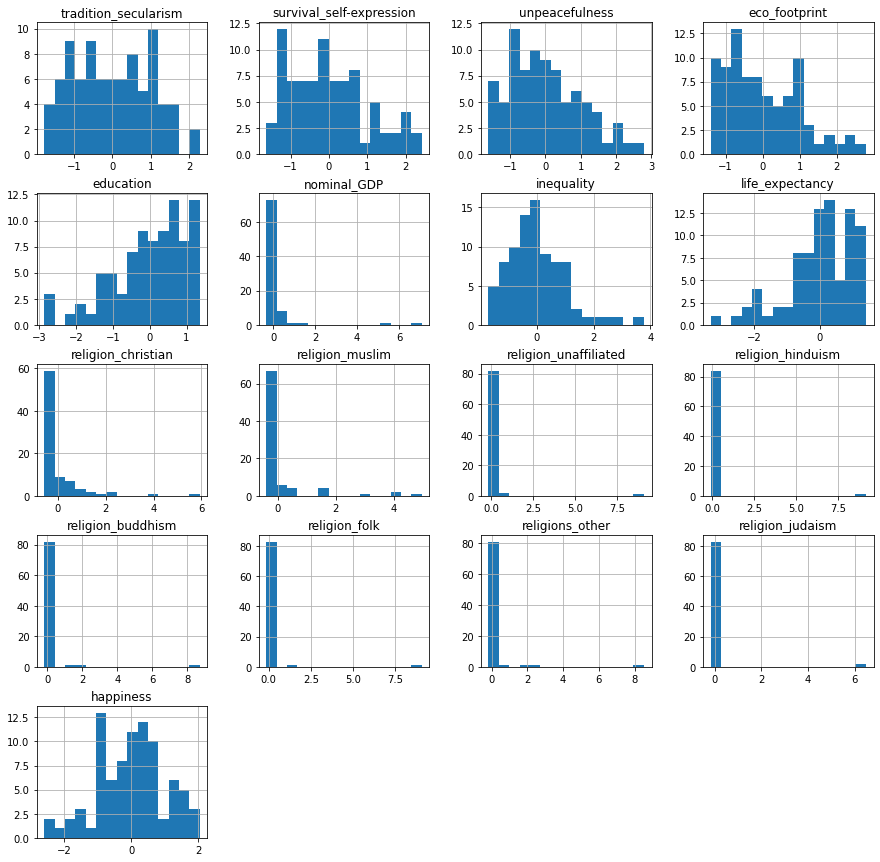

In [102]:
scaled_redux.hist(bins=15,figsize=(15,15));

In [103]:
# they are unchanged, so we will continue
K_Means=KMeans(n_clusters=10,random_state=5)

In [104]:
clusters=K_Means.fit(scaled_redux)

In [105]:
scaled_redux['cluster']=clusters.labels_

In [106]:
scaled_redux['cluster'].value_counts()

6    20
7    16
1    16
0    14
4    11
9     4
3     1
2     1
8     1
5     1
Name: cluster, dtype: int64

In [107]:
scaled_redux.index=dataredux.index

In [108]:
scaled_redux

,tradition_secularism,survival_self-expression,unpeacefulness,eco_footprint,education,nominal_GDP,inequality,life_expectancy,religion_christian,religion_muslim,religion_unaffiliated,religion_hinduism,religion_buddhism,religion_folk,religions_other,religion_judaism,happiness,cluster
country,,,,,,,,,,,,,,,,,,
Albania,0.372103,-1.087243,-0.377554,-0.682703,0.098970,-0.325817,-0.437767,0.478484,-0.544477,-0.326891,-0.163087,-0.112069,-0.172914,-0.133820,-0.179213,-0.181861,-0.651899,7
Algeria,-1.188444,-0.685130,0.434697,-0.726698,-0.422782,-0.273550,-1.227075,0.208962,-0.558349,0.495707,-0.155043,-0.112069,-0.172914,-0.133664,-0.179213,-0.181861,-0.878760,7
Argentina,-0.362864,0.440787,-0.034694,-0.228085,0.556308,-0.179626,0.718005,0.175052,0.358287,-0.382395,-0.098868,-0.112069,-0.172368,-0.123645,-0.142918,0.046326,0.149021,0
Armenia,0.855369,-1.258142,0.587760,-0.672926,0.124736,-0.321970,-0.268630,-0.076481,-0.478583,-0.392499,-0.163219,-0.112069,-0.172914,-0.133820,-0.179213,-0.181861,-0.488164,7
Australia,0.513056,1.818025,-1.197969,2.788035,1.284185,0.192832,-0.268630,1.167336,-0.160322,-0.378815,-0.092670,-0.109163,-0.151292,-0.129281,-0.123981,-0.058991,1.385908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,-1.309261,0.491051,1.357153,-0.017886,0.073204,-0.311886,0.379730,-0.557737,0.130729,-0.390325,-0.125505,-0.112069,-0.172914,-0.132098,-0.174479,-0.181861,-0.873828,0
Vietnam,-0.000415,-0.202594,-0.263267,-0.956451,-0.667555,-0.207726,-0.085398,-0.026652,-0.368672,-0.388534,0.179634,-0.112069,0.349452,1.110471,-0.070326,-0.181861,-0.361911,7
Zambia,-0.473613,-0.564496,-0.410207,-1.279083,-0.963858,-0.319363,2.930885,-1.859661,-0.219279,-0.390836,-0.162823,-0.112021,-0.172914,-0.132724,-0.142918,-0.181861,-1.681652,4


# Definitive clusters
## First we have to find the optimum number of clusters (K)

In [109]:
scaled_redux=scaled_redux.drop('cluster',axis=1)

In [110]:
K=range(2,25)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(scaled_redux)
    inertia.append(kmeans.inertia_)

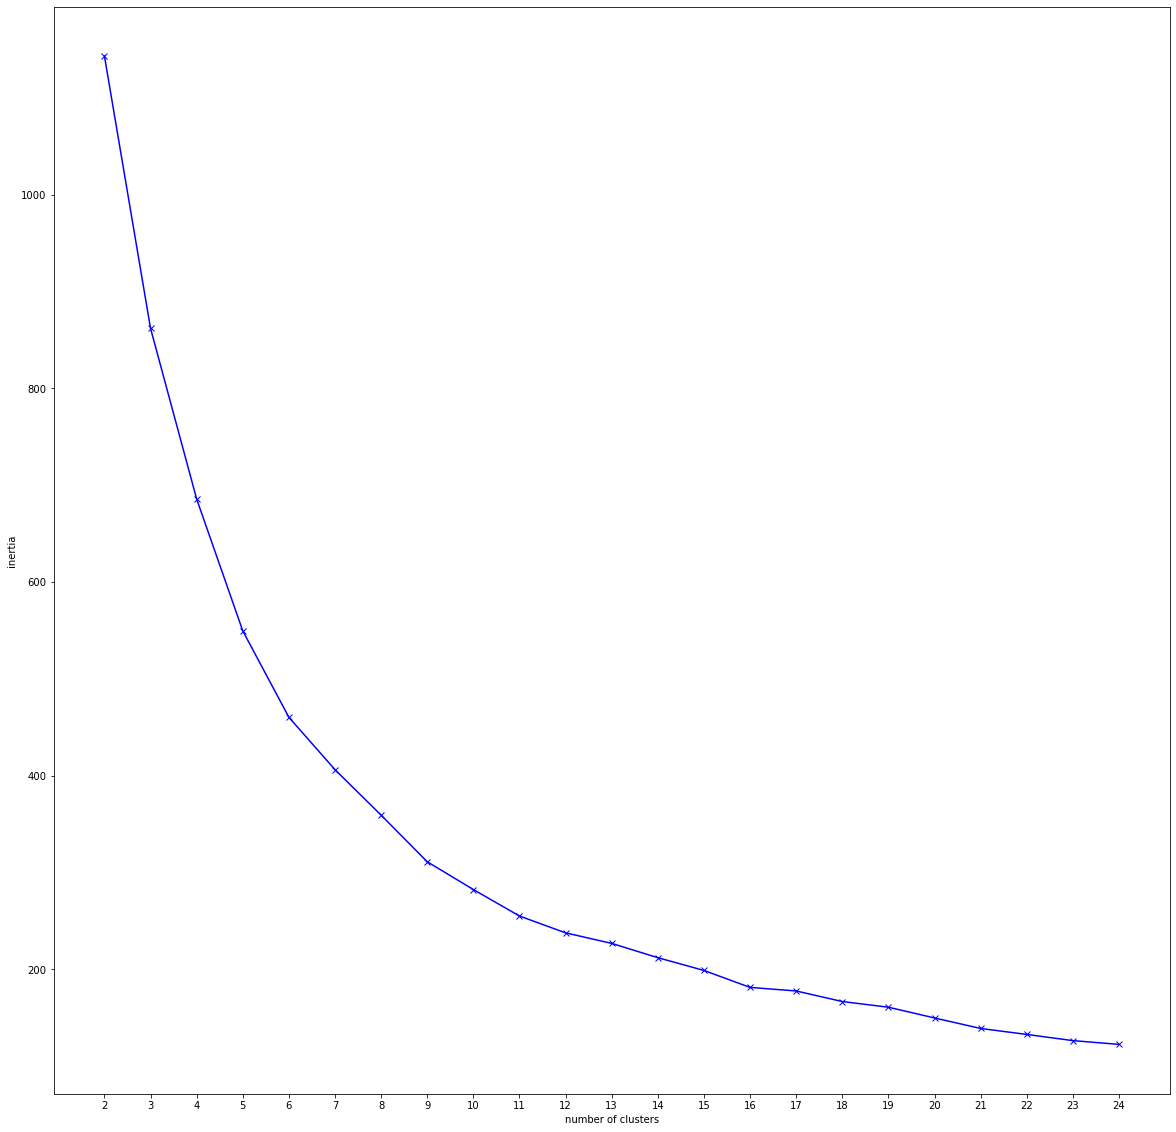

In [111]:
# let's see the elbow

plt.figure(figsize=(20,20))
plt.plot(K,inertia,'bx-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0));

# could be 5, 9 or 10

In [112]:
K=range(2,25)
sil=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(scaled_redux)
    sil.append(silhouette_score(scaled_redux,kmeans.predict(scaled_redux)))

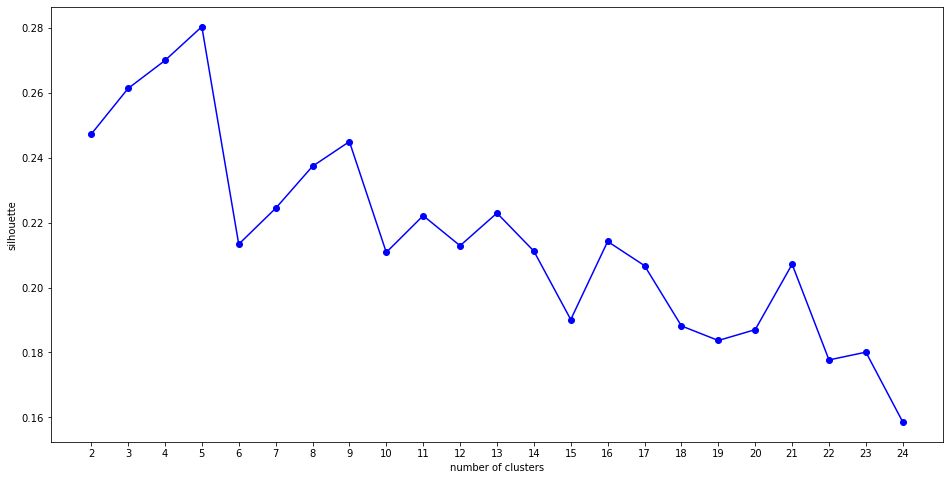

In [113]:
# and now, the silhouette score

plt.figure(figsize=(16,8))
plt.plot(K,sil,'bo-')
plt.xlabel('number of clusters')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K),max(K)+1,1.0));

# we will stick with 5

## Now we will apply the 5 clusters to the dataframe

In [114]:
kmeans=KMeans(n_clusters=5, random_state=5)

In [115]:
clusters=kmeans.fit(scaled_redux)

In [116]:
scaled_redux['cluster']=clusters.labels_

In [117]:
scaled_redux.to_csv('scaled clusters.csv')